- # 1. Import libraries <br/>
- # 2. import data set <br/>
- # 3. preprocess data set <br/>
- # 4 [Split data set into Train and Test Set](#section 4) <br/>
- # 5. Create model <br/>
- # 6. Fit the train set into model <br/>
- # 7. Test the Model - get he Mean Error, root mean square error, square error <br/>
- # 8. Prediction <br/>


1. Import libraries <br/>

In [2]:
# importing the librarise
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
#import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

2. import data set

In [3]:
avaocado = pd.read_csv('avocado.txt')

- View data head for high level understanding

In [4]:
avaocado.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In this data set , Average Price provided for conventional and organoc type Avocado from differnt region, number of bags and region from 2015 to 2018

In [5]:
avaocado.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [6]:
avaocado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


- preprocess data

Avacado data set is good to choose for linear regression. we can predict the avarage price based on volume, large bag and small bag

In [7]:
avaocado.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Since there is no null value present. This data set is preprocessed. Good to process.

Now lets predict the avarage price of avacado bag based on the volume, no if bags,type,year and region. Lets check the corelation for more depath analysis

In [8]:
avaocado.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


- Avarage price is negatively corelated with Total volume and number of bags. this means that the average price is decreasing with high volume and more number of bags. this is obivious. <br/>
- Year don't have much corelation with Average Price. We can drop the year also <br/>
- Total bags, Small and largebags are highly corelated.Actualt Total bags = small bags + large bags. We can drop Total Bags. Also column 4046,4225, 4770 have very strong corelation to each other.  <br/>

In [9]:
avaocado =avaocado.drop(columns = ['4046','4225','4770','Total Bags','year'],axis=1)

In [10]:
avaocado.head()

,Date,AveragePrice,Total Volume,Small Bags,Large Bags,XLarge Bags,type,region
0,2015-12-27,1.33,64236.62,8603.62,93.25,0.0,conventional,Albany
1,2015-12-20,1.35,54876.98,9408.07,97.49,0.0,conventional,Albany
2,2015-12-13,0.93,118220.22,8042.21,103.14,0.0,conventional,Albany
3,2015-12-06,1.08,78992.15,5677.40,133.76,0.0,conventional,Albany
4,2015-11-29,1.28,51039.60,5986.26,197.69,0.0,conventional,Albany


In [11]:
avaocado.corr()

,AveragePrice,Total Volume,Small Bags,Large Bags,XLarge Bags
AveragePrice,1.000000,-0.192752,-0.174730,-0.172940,-0.117592
Total Volume,-0.192752,1.000000,0.967238,0.880640,0.747157
Small Bags,-0.174730,0.967238,1.000000,0.902589,0.806845
Large Bags,-0.172940,0.880640,0.902589,1.000000,0.710858
XLarge Bags,-0.117592,0.747157,0.806845,0.710858,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


Text(0.5, 1, 'Pair Plot')

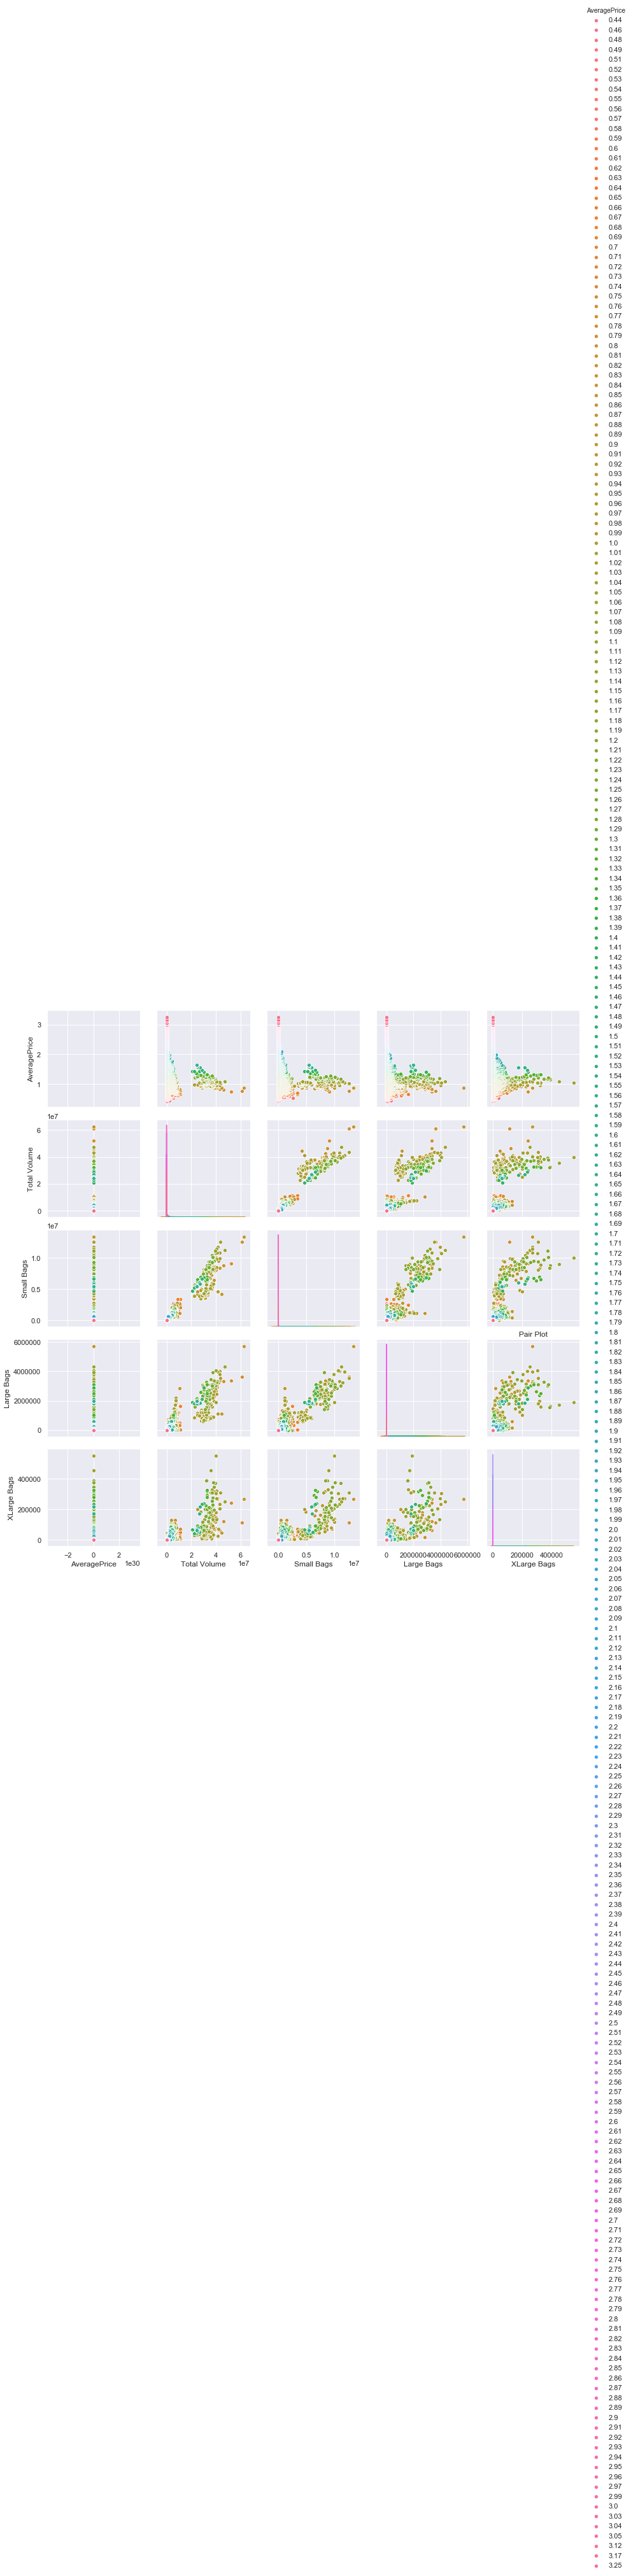

In [12]:
sns.pairplot(avaocado[["AveragePrice","Total Volume","Small Bags","Large Bags","XLarge Bags"]],hue="AveragePrice", dropna=True)
plt.title('Pair Plot')

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

- lets fit the data for a liner model
- Date not have contribution , we can drop date

In [14]:
avaocado = avaocado.drop("Date", axis = 1)

In [15]:
avaocado.sample(5)

,AveragePrice,Total Volume,Small Bags,Large Bags,XLarge Bags,type,region
14,2.07,551895.80,79455.71,9519.58,85.15,conventional,Chicago
14,1.59,35004.70,8769.31,15688.02,0.00,organic,Seattle
16,1.33,204963.95,62373.15,7805.93,537.50,conventional,Charlotte
40,2.18,87897.32,34341.53,83.03,0.00,organic,NewYork
51,1.42,22480.07,1076.67,11279.77,0.00,organic,Denver


- lets see how Avarage Price varies with different type

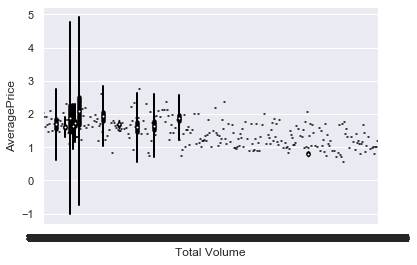

In [16]:
ax = sns.violinplot(x="Total Volume", y="AveragePrice", palette="gnuplot", data=avaocado)

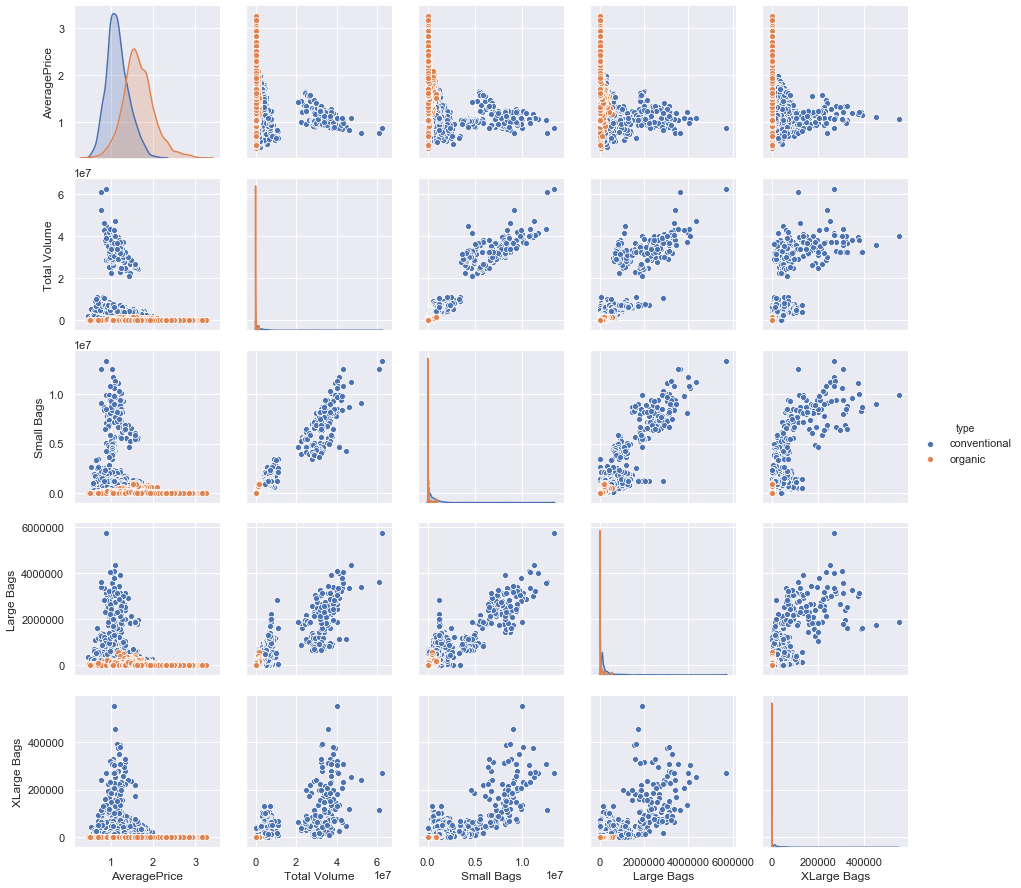

In [17]:
sns.pairplot(avaocado,hue = "type")

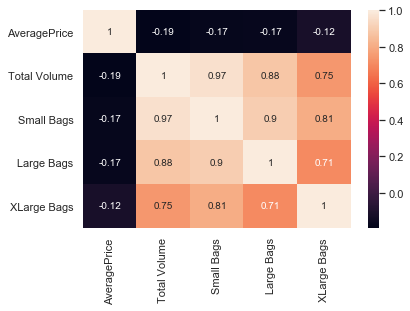

In [18]:
sns.heatmap(avaocado.corr(),annot = True)

- ## Get dumies for region and type 

In [19]:
avaocado_new = pd.get_dummies(avaocado,columns = ["type","region"],drop_first=True)

In [20]:
avaocado_new.sample(5)

,AveragePrice,Total Volume,Small Bags,Large Bags,XLarge Bags,type_organic,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
12,1.87,8341.95,3318.47,172.62,0.00,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.98,928716.60,218017.64,94469.00,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.03,263363.41,135219.03,24337.13,3998.22,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1.27,2135242.76,423570.05,21523.99,6.03,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,1.81,13620.12,8652.98,919.71,0.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


  - ## lets devid the columns in x and y set . Dependent and independent variable

In [21]:
x = avaocado_new.loc[:,avaocado_new.columns!='AveragePrice']

In [22]:
x.sample(2)

,Total Volume,Small Bags,Large Bags,XLarge Bags,type_organic,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
33,82244.67,16236.09,26265.11,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,16859.85,12014.56,118.42,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
y=avaocado_new.AveragePrice
y.sample(2)

18    1.69
7     1.42
Name: AveragePrice, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split


In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state =1)

In [64]:
x_test.describe()

,Total Volume,Small Bags,Large Bags,XLarge Bags,type_organic,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
count,5.475000e+03,5.475000e+03,5.475000e+03,5475.000000,5475.000000,5475.000000,5475.000000,5475.000000,5475.000000,5475.000000,...,5475.000000,5475.000000,5475.000000,5475.000000,5475.000000,5475.000000,5475.000000,5475.000000,5475.000000,5475.000000
mean,9.228745e+05,1.973397e+05,6.026755e+04,3354.523834,0.496073,0.022100,0.021370,0.017900,0.019178,0.019726,...,0.017717,0.018447,0.017352,0.018813,0.018995,0.019726,0.018082,0.019909,0.017900,0.022466
std,3.757959e+06,8.244010e+05,2.749403e+05,18627.818656,0.500030,0.147024,0.144627,0.132598,0.137163,0.139070,...,0.131933,0.134575,0.130590,0.135876,0.136521,0.139070,0.133261,0.139699,0.132598,0.148206
min,5.150100e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.073400e+04,2.764520e+03,1.116400e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.090172e+05,2.774290e+04,2.461880e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.527943e+05,8.404535e+04,2.234304e+04,139.630000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.228870e+07,1.254033e+07,4.081398e+06,390478.730000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
x_train.describe()

,Total Volume,Small Bags,Large Bags,XLarge Bags,type_organic,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
count,1.277400e+04,1.277400e+04,1.277400e+04,12774.000000,12774.000000,12774.000000,12774.000000,12774.000000,12774.000000,12774.000000,...,12774.000000,12774.000000,12774.000000,12774.000000,12774.000000,12774.000000,12774.000000,12774.000000,12774.000000,12774.000000
mean,8.196857e+05,1.757035e+05,5.179669e+04,3000.090758,0.501566,0.016988,0.017301,0.018788,0.018240,0.018005,...,0.018866,0.018553,0.019023,0.018397,0.018318,0.018005,0.018710,0.017927,0.018788,0.016596
std,3.314197e+06,7.099541e+05,2.293782e+05,17276.361630,0.500017,0.129230,0.130395,0.135781,0.133824,0.132976,...,0.136059,0.134946,0.136611,0.134386,0.134106,0.132976,0.135504,0.132692,0.135781,0.127758
min,8.456000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.092140e+04,2.883380e+03,1.324750e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.069250e+05,2.564453e+04,2.741385e+03,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.220698e+05,8.317101e+04,2.187546e+04,129.900000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.250565e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
y_test.describe()

count    5475.000000
mean        1.404805
std         0.400644
min         0.440000
25%         1.100000
50%         1.370000
75%         1.670000
max         2.970000
Name: AveragePrice, dtype: float64

In [67]:
from sklearn.linear_model import LinearRegression
linearmodel = LinearRegression()
linearmodel.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Use model Evaluation
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

In [68]:
y_pred_test = linearmodel.predict(x_test)

In [69]:
y_pred_train = linearmodel.predict(x_train)

In [70]:
from sklearn import metrics

In [71]:
MAE_train = metrics.mean_absolute_error(y_train,y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test,y_pred_test)
print('Mean Absolute Error train {}'.format(MAE_train))
print('Mean Absolute Error test {}'.format(MAE_test))

Mean Absolute Error train 0.20293360125513737
Mean Absolute Error test 0.2022302022916848


## Evaluation with Mean Square error

In [72]:
MSE_train = metrics.mean_squared_error(y_train,y_pred_train)
MSE_test = metrics.mean_squared_error(y_test,y_pred_test)
print('Mean Square Error for train {}'.format(MSE_train))
print('Mean Square Error for test {}'.format(MSE_test))

Mean Square Error for train 0.07329446197590091
Mean Square Error for test 0.07264136826209223


## Evaluation with Root Mean Square Error

In [73]:
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))
print('Mean Square Error for train {}'.format(RMSE_train))
print('Mean Square Error for test {}'.format(RMSE_test))

Mean Square Error for train 0.2707294996410641
Mean Square Error for test 0.2695206267840965


In [74]:
print(y_pred_test)

[1.72151479 1.06219375 1.23080332 ... 1.4620372  1.86290741 1.31406801]


In [37]:
print('Intercept:',linearmodel.intercept_)          # print the intercept 
print('Coefficients:',linearmodel.coef_)

Intercept: 1.3302423779107262
Coefficients: [-1.51845816e-08  4.41778377e-08 -4.64859928e-08  1.28298059e-06
  4.86943844e-01 -2.63332080e-01 -3.98623319e-02 -2.54308223e-01
 -3.93059293e-02 -6.73353723e-02 -1.99427725e-01  3.93327806e-02
 -4.27185699e-03 -3.55419045e-01 -3.25400315e-01 -5.02185211e-01
 -3.30662979e-01 -3.50550821e-01 -9.90152017e-02 -2.52654596e-01
 -8.20471822e-02  2.67144309e-01 -5.38946329e-01 -2.75165108e-01
 -4.12419076e-02 -2.00469021e-01 -3.66006630e-01 -3.08928695e-01
 -1.14947936e-01 -1.56968690e-01 -3.32525493e-01 -2.60772470e-01
  1.41297188e-01  2.76493206e-02 -1.04860055e-01 -1.36724380e-02
  7.14272008e-02 -3.00289834e-01 -1.85774570e-01 -1.39739348e-01
 -2.31279302e-01 -4.31859826e-02 -2.86727434e-01 -2.84297279e-01
  5.14009999e-02 -1.60777825e-01  2.41930296e-01 -2.12844284e-01
 -1.45424738e-01 -4.71769816e-01 -1.51824017e-01 -1.50481726e-01
 -1.46714372e-01 -2.05129344e-02 -1.43971936e-01 -1.90530887e-01
 -2.74702018e-01 -3.27231139e-01]


## Lets build a decision tree model with this data set and check the accuracy<br/>
- Lets drop the region variable as well and fit this into the decison tree model


In [38]:
avaocado2 = pd.read_csv('avocado.txt')
avaocado2.sample()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
17,2016-08-28,1.32,269377.79,45946.25,114244.06,1086.91,108100.57,102788.68,2348.73,2963.16,conventional,2016,HarrisburgScranton


In [39]:
avaocado2 = avaocado2.drop(columns = ['Date','4046','4225','4770','year','Total Bags','region'])

In [40]:
avaocado2.sample(3)

,AveragePrice,Total Volume,Small Bags,Large Bags,XLarge Bags,type
34,0.84,42867608.54,8376124.32,3365582.11,62734.87,conventional
14,1.45,3442454.03,1009926.82,66387.53,218.89,conventional
6,1.74,92968.52,57577.44,28.69,0.00,organic


- Lets get dumies and Lets devide the variable into test and train

In [41]:
avaocado2 = pd.get_dummies(avaocado2,columns = ['type'],drop_first=True)

In [42]:
avaocado2.sample(5)

,AveragePrice,Total Volume,Small Bags,Large Bags,XLarge Bags,type_organic
30,0.92,242168.85,22104.57,40394.05,976.67,0
31,1.40,440574.33,129470.64,16871.38,2.67,0
13,0.91,664201.67,59972.02,63.25,0.00,0
45,1.18,30537.03,1928.78,18574.59,0.00,1
7,1.57,11495.44,8314.51,110.84,0.00,1


In [43]:
X = avaocado2.loc[:,avaocado2.columns!='AveragePrice']
X.sample(2)

,Total Volume,Small Bags,Large Bags,XLarge Bags,type_organic
7,84.56,73.33,3.33,0.0,1
17,14052.55,8315.09,563.52,0.0,1


In [44]:
Y = avaocado2.AveragePrice
Y.sample()

35    2.4
Name: AveragePrice, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state =1)

In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12774 entries, 23 to 27
Data columns (total 5 columns):
Total Volume    12774 non-null float64
Small Bags      12774 non-null float64
Large Bags      12774 non-null float64
XLarge Bags     12774 non-null float64
type_organic    12774 non-null uint8
dtypes: float64(4), uint8(1)
memory usage: 511.5 KB


In [47]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5475 entries, 23 to 51
Data columns (total 5 columns):
Total Volume    5475 non-null float64
Small Bags      5475 non-null float64
Large Bags      5475 non-null float64
XLarge Bags     5475 non-null float64
type_organic    5475 non-null uint8
dtypes: float64(4), uint8(1)
memory usage: 219.2 KB


- now the current data set will be Train with 12774 instances and will be tested through 5474 inastances

In [48]:
from sklearn import tree
decisionmodel = tree.DecisionTreeRegressor(random_state=0)
decisionmodel.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [49]:
Y_pred_test = decisionmodel.predict(X_test)

In [50]:
Y_pred_train = decisionmodel.predict(X_train)

In [56]:
print(Y_pred_test)

[1.32 1.15 1.5  ... 1.23 1.81 1.06]


## Model Evaluation <br/>
- MAE
- MSE
- RMSE

In [52]:
MAE_train = metrics.mean_absolute_error(Y_train,Y_pred_train)
MAE_test = metrics.mean_absolute_error(Y_test,Y_pred_test)
print('Mean Absolute Error train {}'.format(MAE_train))
print('Mean Absolute Error test {}'.format(MAE_test))

Mean Absolute Error train 2.607381457550861e-19
Mean Absolute Error test 0.23882557077625574


In [53]:
MSE_train = metrics.mean_squared_error(Y_train,Y_pred_train)
MSE_test = metrics.mean_squared_error(Y_test,Y_pred_test)
print('Mean Square Error for train {}'.format(MSE_train))
print('Mean Square Error for test {}'.format(MSE_test))

Mean Square Error for train 4.6316398850458657e-35
Mean Square Error for test 0.11692348858447488


In [54]:
RMSE_train = np.sqrt(metrics.mean_squared_error(Y_train,Y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_test))
print('Root Mean Square Error for train {}'.format(RMSE_train))
print('Rot Mean Square Error for test {}'.format(RMSE_test))

Root Mean Square Error for train 6.805615244080336e-18
Rot Mean Square Error for test 0.3419407676549769
